In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data description
Data source: https://www.kaggle.com/PromptCloudHQ/imdb-data
The data set includes 1,000 most popular movies on IMDB from 2006 to 2016.
The data features included are:
    1. Title; 
    2. Genre (Action/Adventure/Sci-Fi/Horror/Thriller/Mystery/Animation/Comedy/Family/Fantasy/Western);
    3. Description;
    4. Director;
    5. Actors;
    6. Year; 
    7. Runtime (Duration of the film in min); 
    8. Rating (IMDb rating); 
    9. Votes; 
    10. Revenue (box office profit); 
    11. Metascrore (Overall score, based on the audience opinion).

In [3]:
df = pd.read_csv("IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Descriptive statistics of data

In [4]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Descriptive statistics summary comments
1. Runtime (Minutes)
    As it can be seen, min duration of the film is 66 mins and max is 191 mins, the average duration is 1,8862 hours
2. Rating
    The rating statistics demonstrates, that that feature varies in the interval [1.9; 9], and mean is closer to
    the maximum value: 6.723. 25% quartile is already corresponds to 6.2.
    The std value (0.945429) is low, that means that the data is not scattered a lot.
3. Votes
    The votes statistics demonstrates, that feature varies in the interval [61; 1791916], and mean is closer to
    the maximum value: 169808,3. 
    The std value (188762,6) is logically high, that means that the data is very scattered.
4. Revenue (Millions)
    The Revenue statistics demonstrates, that feature varies in the interval [0; 936.63], and mean is closer to
    the min value: 82.956376. 
    The std value is 103.253540.
5. Metascore
    The Metascore statistics demonstrates, that feature varies in the interval [11; 100], and mean is 58.985043. 
    The std value is 17.194757.

In [5]:
# The film with max Revenue (Millions)
df[df['Revenue (Millions)']==df['Revenue (Millions)'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [6]:
# The film with max Metascore
df[df['Metascore']==df['Metascore'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0


In [456]:
# The film with max Rating and Votes
df[df['Rating']==df['Rating'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


## Distribution of target feature (Metascore)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


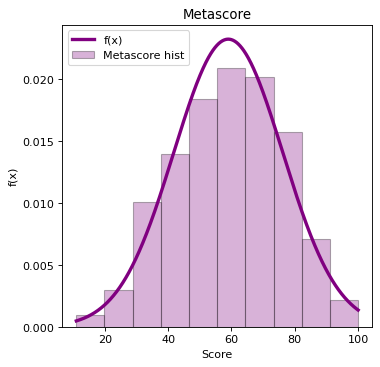

In [7]:
from scipy.stats import norm

metascore_mean = df['Metascore'].mean()
metascore_std = df['Metascore'].std()

x = np.linspace(11, 100, 1001)  # Max and min of the Metascore value 1.1
y = [norm.pdf(i, 58.985043, 17.194757) for i in x] # f(x) (Theoretical density function) with mean and std of Metascore

fig, ax = plt.subplots(figsize=(5,5), dpi = 80)
# Hist
ax.hist(df.Metascore, color='purple',edgecolor = 'black', density = True, label = 'Metascore hist',alpha=0.3)
# Theoretical function
ax.plot(x, y, label='f(x)', color = 'purple', linestyle = '-', lw=3)
plt.title('Metascore')
ax.legend()
plt.ylabel('f(x)')
plt.xlabel('Score')
plt.show()

### Distribution of target feature (Metascore) comments
As it can be seen at the histogram, the target feature is normally distributed.

## Skewness and Kurtosis of target feature
Skewness:
$$
\gamma _{1}={\frac  {\mu _{3}}{\sigma ^{3}}}.
$$

Kurtosis:
$$
{\displaystyle \operatorname {Kurt} [X]={\frac {\mu _{4}}{\sigma ^{4}} -3}.}
$$

In [8]:
x_i = df['Metascore'].dropna().values
numerator = x_i - metascore_mean
numerator**=3
numerator /= len(x_i)
skewness = numerator/((metascore_std)**3)
print('Skewness is: ', skewness.sum())

numerator = x_i - metascore_mean
numerator**=4
numerator /= len(x_i)
kurtosis = numerator/((metascore_std)**4)
print('Kurtosis is: ', kurtosis.sum() - 3)

Skewness is:  -0.12349055472673079
Kurtosis is:  -0.6204358218469217


### Skewness and Kurtosis comments
- Skewness is < 0, so the long tail of the curve is situated on the left from the mean.
- Kurtosis is < 0, so the distribution of the feature corresponds to the "Flat-top" distribution. 
    That means that less of the values are situated closer to the mean value.

Both of the values are close to the normal distribution value 0.

# Relationships of target feature with numerical variables

<Figure size 360x360 with 0 Axes>

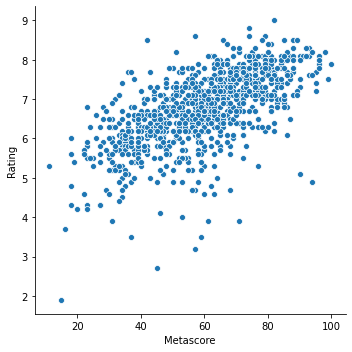

<Figure size 360x360 with 0 Axes>

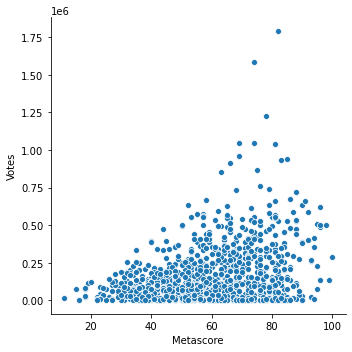

<Figure size 360x360 with 0 Axes>

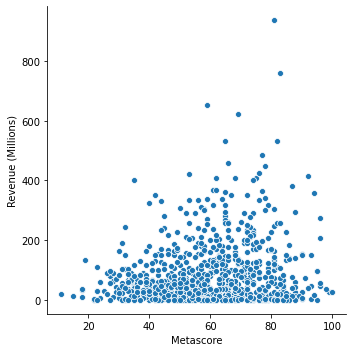

<Figure size 360x360 with 0 Axes>

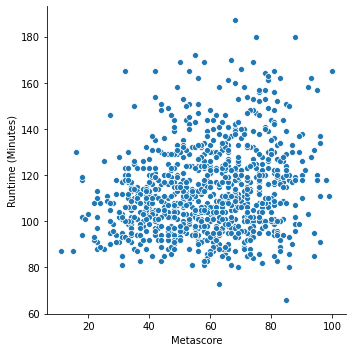

In [10]:
cols = ['Rating', 'Votes', 'Revenue (Millions)', 'Runtime (Minutes)']
for i in cols:
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    sns.relplot(x="Metascore", y= i, data=df)
    plt.show()

# Relationships of target feature with numerical variables comments
1. Rating
The rating value seems to be correlated with the Metascore. 
As the value of rating raises with the metascore value raise. (linear dependence)
2. Votes
The votes seems to be not correlated with the metascore, but this value raises with the raise of the frequency of meatscore.
Votes distribution seems to be exponential.
3. Revenue (Millions)
The revenue seems to be not correlated with the metascore, but this value raises with the raise of the frequency of meatscore.
Revenue (Millions) distribution seems to be exponential.
4. Runtime (Minutes)
The Runtime (Minutes) seems to be not correlated with the Metascore. 
The duration if film raises a bit with the metascore value raise.
Logically, these features are not correlated.

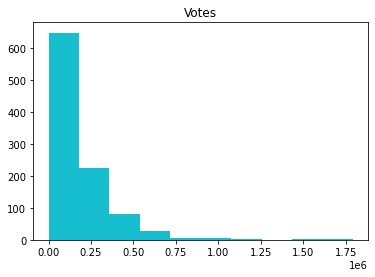

In [11]:
plt.hist(df['Votes'],label=' Votes', color = 'tab:cyan', linestyle = '-', lw=3)
plt.title('Votes')
plt.show()

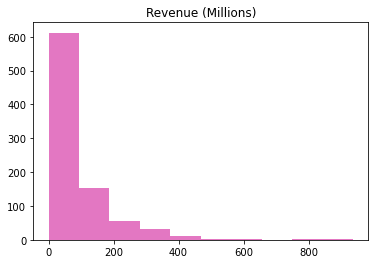

In [13]:
plt.hist(df['Revenue (Millions)'],label='Revenue (Millions)', color = 'tab:pink', linestyle = '-', lw=3)
plt.title('Revenue (Millions)')
plt.show()

# Relationships of target feature with categorical variables

## Metascore - Genre relationship

In [14]:
# We can leave the first genre only as it is the most descriptive one
df['Main_genre'] = df['Genre'].apply(lambda x: x.split(','))
df['Main_genre'] = df['Main_genre'].apply(lambda x: x[0])
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Main_genre
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,Crime
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Horror
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Drama
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,Adventure
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0,Comedy


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Main_genre)
df['Main_genre_le'] = le.transform(df.Main_genre)
x = sorted (df['Main_genre_le'].unique())
df = df.drop(columns=['Rank', 'Genre', 'Description', 'Actors'])
dictionary_genres = {}
for i in x:
    dictionary_genres[i] = df [df['Main_genre_le'] == i]['Main_genre'].values[0]

0 Action
1 Adventure
2 Animation
3 Biography
4 Comedy
5 Crime
6 Drama
7 Fantasy
8 Horror
9 Mystery
10 Romance
11 Sci-Fi
12 Thriller



<Figure size 1440x1440 with 0 Axes>

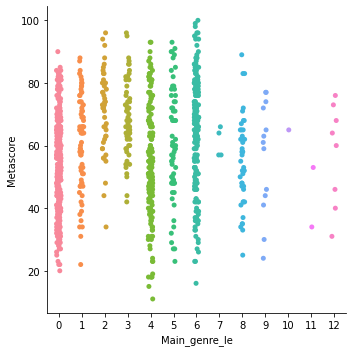

In [16]:
for i in range(0, len(dictionary_genres)):
    print(i, dictionary_genres.get(i))
print()
fig = plt.gcf()
fig.set_size_inches(20,20)
sns.catplot(x="Main_genre_le", y="Metascore", data=df)
plt.show()

### Comments of Metascore - genre relationship
    As it can be seen from the plot, the highest metascore corresponds to the drama, animation, biography genres of movies.
    
    The least metascore corresponds to the following genres: Romance, Sci-Fi Thriller, Fantasy, that can be the property of the data, because the number of movies of that genres is low.

## Metascore - Director relationship

In [17]:
print(len(df['Director'].unique()))

644


In [18]:
# As the length of the unique values of df['Director'] is not equal to 1000 (overall length),
# it can be estimated, which directors have the highest mean metascore
x = df['Director'].value_counts()
directors = df.groupby('Director', as_index=False)['Metascore'].mean()
print('Table 1')
directors.sort_values(by=['Metascore'], ascending= False).head(30)

Table 1


,Director,Metascore
58,Barry Jenkins,99.0
363,Kenneth Lonergan,96.0
610,Todd Haynes,95.0
357,Kathryn Bigelow,94.5
425,Michael Goi,94.0
398,Maren Ade,93.0
616,Tom McCarthy,93.0
377,Lee Unkrich,92.0
515,Richard Linklater,91.5
490,Pete Docter,91.0


In [19]:
x = df['Title'].value_counts()
directors = df.groupby(['Title' ,'Director'], as_index=False)['Metascore'].mean()
print('Table 2')
directors.sort_values(by=['Metascore'], ascending= False).head(20)

Table 2


,Title,Director,Metascore
107,Boyhood,Richard Linklater,100.0
486,Moonlight,Barry Jenkins,99.0
534,Pan's Labyrinth,Guillermo del Toro,98.0
280,Gravity,Alfonso Cuarón,96.0
3,12 Years a Slave,Steve McQueen,96.0
574,Ratatouille,Brad Bird,96.0
451,Manchester by the Sea,Kenneth Lonergan,96.0
994,Zero Dark Thirty,Kathryn Bigelow,95.0
126,Carol,Todd Haynes,95.0
874,The Social Network,David Fincher,95.0


### Comments of Metascore - director relationship
    The Director feature is not a categorical variable, but it's quite interesting, that directors, whose
    films are with the the top metascore, have the lower metascore on the other films.
    That is so, because not everyone from the Table 2 appears in the first top-30 if the table 1.

# Correlation matrix 

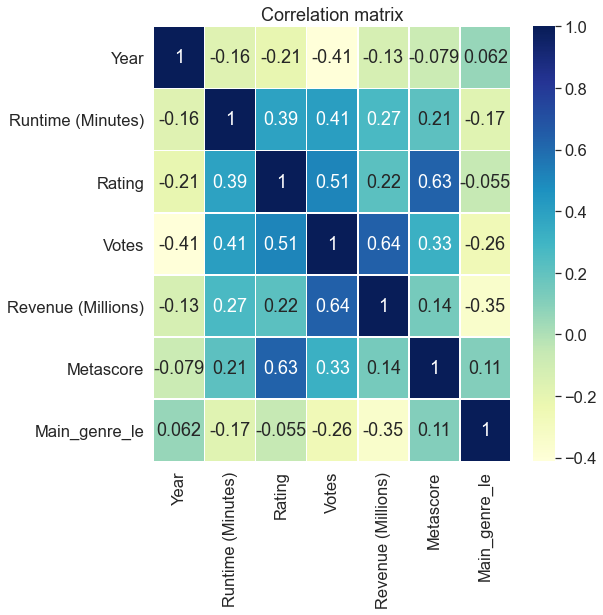

In [21]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
sns.heatmap(df.corr(), cmap="YlGnBu",annot = True, linewidths=.5)
plt.title('Correlation matrix')
plt.show()

## Conclusion
The 'Metascore' feature is highly correlated with feature 'Rating' (0.63) and not highly with: 'Votes' (0.33) and 'Runtime' (0.21). 

Other significant values of correlation coefficients are:
- Votes and Revenue (0.63);
- Votes and Rating (0.51).

# Scatter_plots between target feature and correlated variables

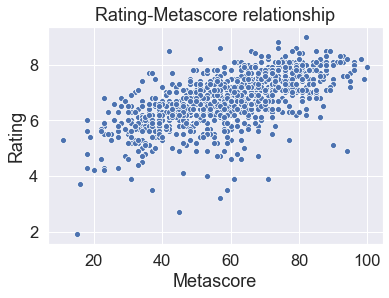

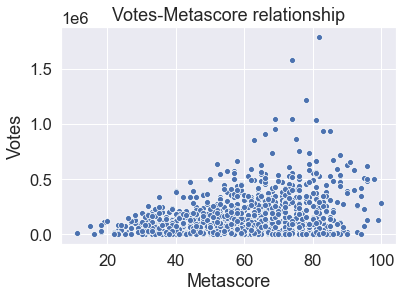

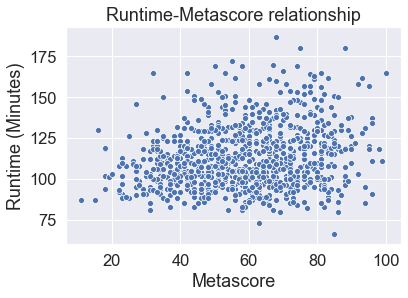

In [22]:
sns.scatterplot(data = df, x = "Metascore", y = 'Rating')
plt.title("Rating-Metascore relationship")
plt.show()
sns.scatterplot(data = df, x = "Metascore", y = 'Votes')
plt.title("Votes-Metascore relationship")
plt.show()
sns.scatterplot(data = df, x = "Metascore", y = 'Runtime (Minutes)')
plt.title("Runtime-Metascore relationship")
plt.show()

#### Conclusions
As it was already shown in the task 2, the Rating an Metascore features are logically highly correlated, 
the dependence seems to be linear.

Runtime and metascore are correlated not significantly.

Votes and metascore are correlated insignificantly, according to the scatter plot.

# Missing data

In [23]:
for i in df.columns:
    print(i, df[i].isnull().values.sum())

Title 0
Director 0
Year 0
Runtime (Minutes) 0
Rating 0
Votes 0
Revenue (Millions) 128
Metascore 64
Main_genre 0
Main_genre_le 0


## The nan values of the Revenue (Millions) can be filled with the mean ones.

In [24]:
df["Revenue (Millions)"] = df["Revenue (Millions)"].fillna(value=df["Revenue (Millions)"].mean())

## The metascore values cannot be filled with the mean values, but they can be dropped.

In [25]:
df.dropna(inplace = True)

# Outliers

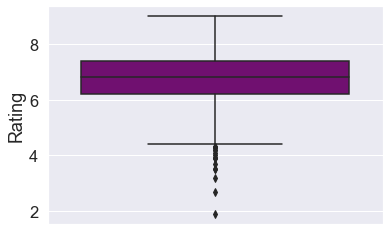

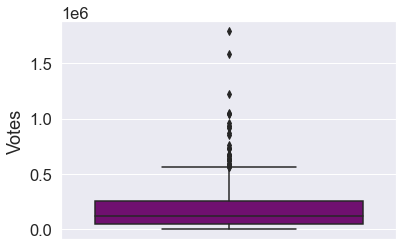

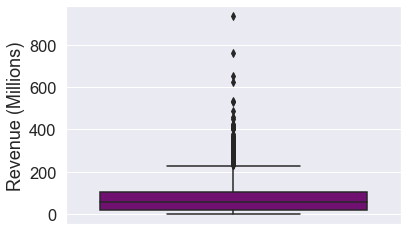

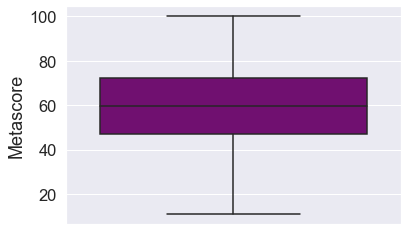

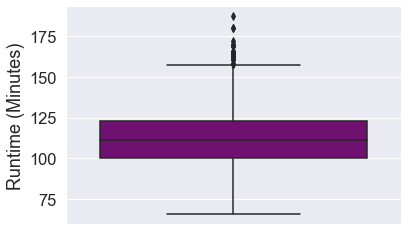

In [26]:
numerical_vars = ['Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Runtime (Minutes)']
for i in numerical_vars:
    fig = plt.gcf()
    sns.boxplot(y = df[i], color = 'purple')
    plt.show()

## Outliers comments

As it can be seen from the boxplots, the outliers take place in 'Rating', 'Votes', 'Revenue (Millions)', 'Runtime (Minutes)'.

To demonstrate, how the outliers affect, for instance, correlation coefficients, they may be excluded and coefficients recalculated.

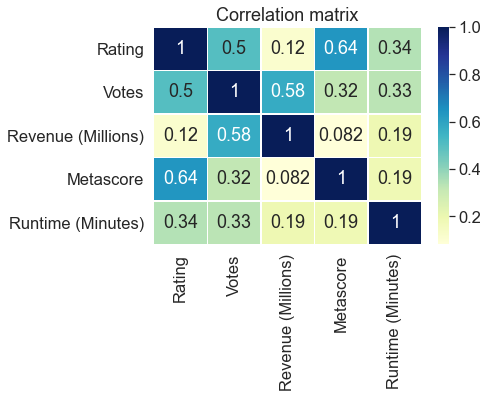

In [475]:
from scipy.stats import zscore
df1 = df[['Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Runtime (Minutes)']]
df1
z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df1 = df1[filtered_entries]
fig = plt.gcf()
sns.set(font_scale = 1.5 )
sns.heatmap(df1.corr(), cmap="YlGnBu",annot = True, linewidths=.5)
plt.title('Correlation matrix')
plt.show()

## New corr matrix analysis
Thus, the correlation coefficients changed: 
- Revenue - Votes correlation decreased from 0.63 to 0.58;
- Metascore - Revenue correlation coefficients decreased from 0.14 to 0.082, that is logically approven;
- 'Runtime'and ['Rating', 'Votes'] correlation coefficients also dropped from 0.39/0.41 to 0.34/0.33. 

# Normality

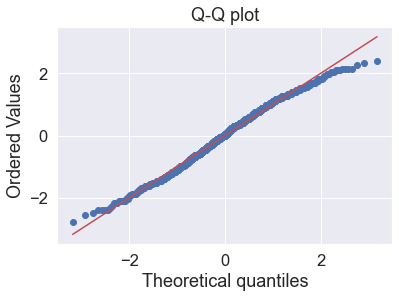

In [646]:
import scipy.stats as stats
obs = df['Metascore'].values
metascore_mean = df['Metascore'].mean()
metascore_std = df['Metascore'].std()
z = (obs-metascore_mean)/metascore_std 
stats.probplot(z, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

In [647]:
# Shapiro-Wilk Test
stat, p = shapiro(obs) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('H0 is accepted')
else:
    print('H0 is rejected')

Statistics=0.991, p-value=0.000
H0 is rejected


## Normality comments
    The Q-Q plot shows the similarity between normal distribution and the distribution of the feature.
    As most of points are situated on the 45 degrees line, the similarity of the distributions can be proposed.
    To prove that the distributions are not similar the statistical tests may be used.
    As shown above, Shapiro-Wilk Test disapproved the null hypothesis, according to which the feature is normally distributed.

# Homoscedasticity
 
    The 'Metascore' feature is correlated with "Votes", "Rating" and "Runtime (Minutes)".
    The homoscedacity is the equal level of variance of metascore predicted value.
    As "Votes" and "Rating" are correlated (0.5), for building the regression model features "Rating" and "Runtime" will be used, because their correlation coefficient is less: 0.33. 
    For building a proper predicting model (y), though, the x variables should be independent.

In [28]:
from sklearn.linear_model import LinearRegression
x = df.loc[:, ('Rating', 'Runtime (Minutes)')]
y = df.loc[:, 'Metascore']
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

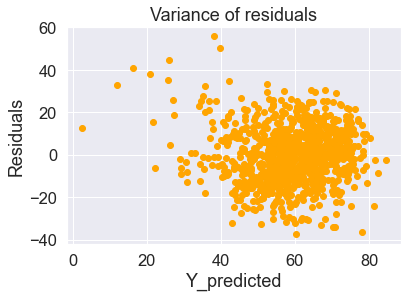

In [29]:
resid = y - y_pred
plt.scatter(y_pred, resid, c = 'orange')
plt.title('Variance of residuals')
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')
plt.show()

## The results of the model

In [30]:
print('Metascore = b0 + b1*Rating + b2*Runtime (Minutes)')
print('b0:', model.intercept_)
print('b1:', model.coef_[0])
print('b2:', model.coef_[1])
print('Coefficient of determination: ', round(model.score(x, y), 4))

Metascore = b0 + b1*Rating + b2*Runtime (Minutes)
b0: -17.005475889339472
b1: 11.890448579305223
b2: -0.03550988883857469
Coefficient of determination:  0.4005


## Homoscedasticity comments
    - As it can be seen from the Variance of residuals scatterplot, there is no constant value of variance.
    - The absence of homoscedasticity is heteroscedasticity.

# Linearity

## Regplots

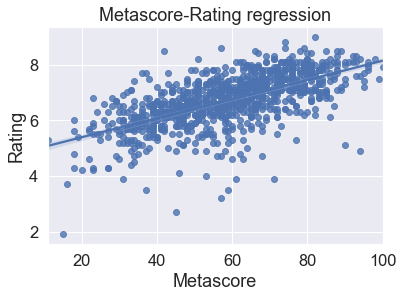

In [31]:
sns.regplot(x="Metascore", y="Rating", data=df)
plt.title('Metascore-Rating regression')
plt.show()

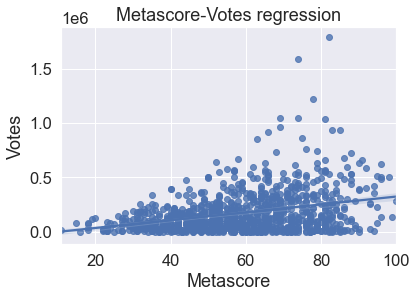

In [32]:
sns.regplot(x="Metascore", y="Votes", data=df)
plt.title('Metascore-Votes regression')
plt.show()

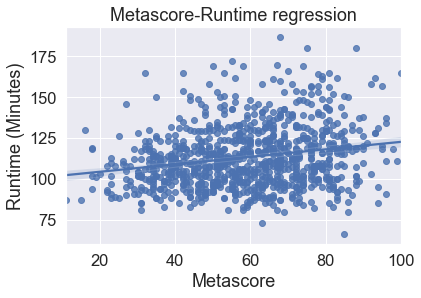

In [33]:
sns.regplot(x="Metascore", y="Runtime (Minutes)", data=df)
plt.title('Metascore-Runtime regression')
plt.show()

## Results of regression model

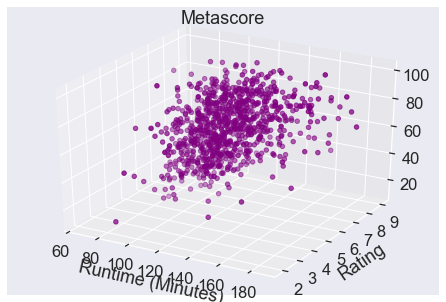

In [34]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter( x.values[:, 1], x.values[:, 0],y.values, c='purple')
plt.title('Metascore')
plt.ylabel('Rating')
plt.xlabel('Runtime (Minutes)')
pyplot.show()

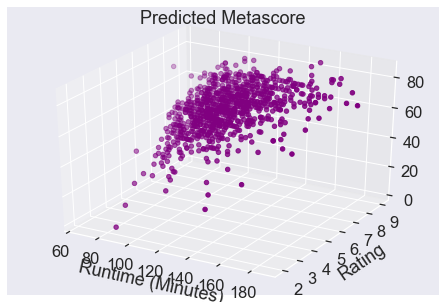

In [35]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter( x.values[:, 1], x.values[:, 0],y_pred, c='purple')
plt.title('Predicted Metascore')
plt.ylabel('Rating')
plt.xlabel('Runtime (Minutes)')
pyplot.show()

### Linearity comments
Looking at the plots in 10.1, it can be concluded that the Rating and Runtime features are linearly dependent on the Metascore.